<a href="https://colab.research.google.com/github/PiyushBagde/Analysis-on-Titanic-survivors-/blob/main/Analysis_on_Titanic_survivors_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA {applying logistic regression}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv'
train = pd.read_csv(url)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# find the missing data

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

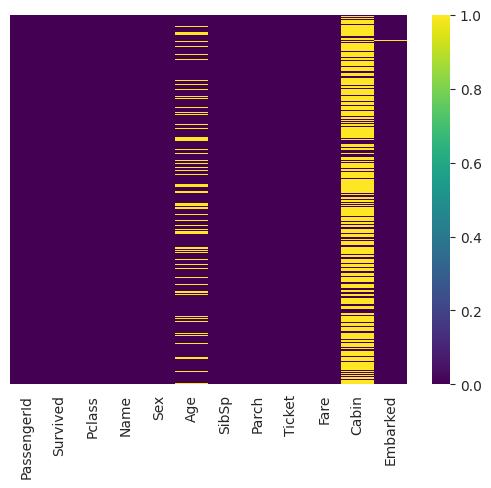

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# here is visualization of all the null/Nan values are present in yellow color
# if yticklabels = True : index will also be printed on the yaxis which we don't want to
# cbar = True gives the colorful gradient scale just like (cold to hold temp scale looks like) to measure the reading from 0 to 1

<Axes: xlabel='Survived', ylabel='count'>

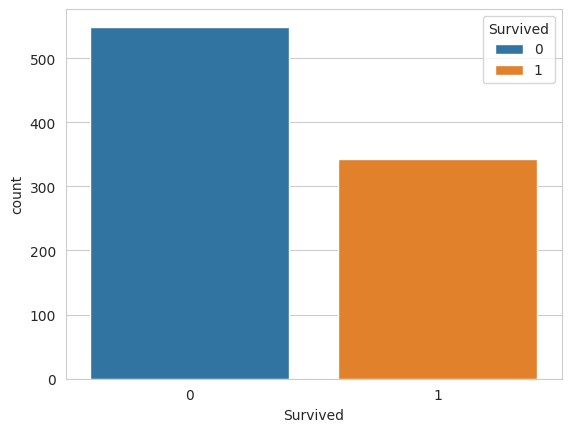

In [ ]:
sns.set_style('whitegrid') # sets bg to grid in white color
sns.countplot(x = 'Survived', data=train, hue='Survived')

# 1-> survived, 0-> survived
# very less people survived

<Axes: xlabel='Survived', ylabel='count'>

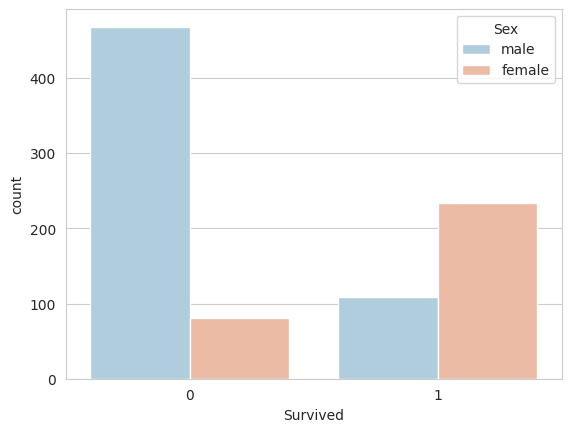

In [ ]:
# among the survived and not survived who were male and female

sns.set_style('whitegrid')
sns.countplot(x = "Survived", hue='Sex', data= train, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

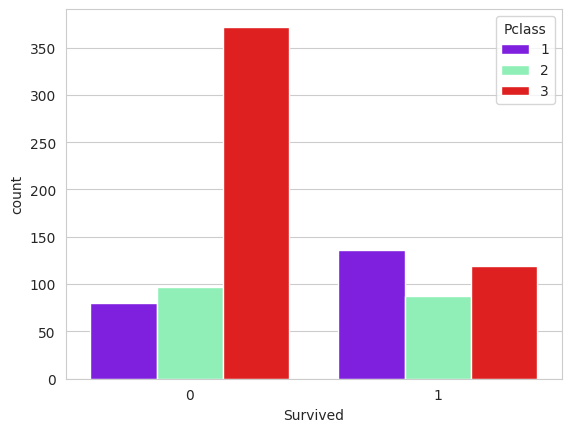

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Pclass', data=train, palette='rainbow')

<ipython-input-52-e70e1193261f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False, color='darkred',bins=40)


<Axes: xlabel='Age'>

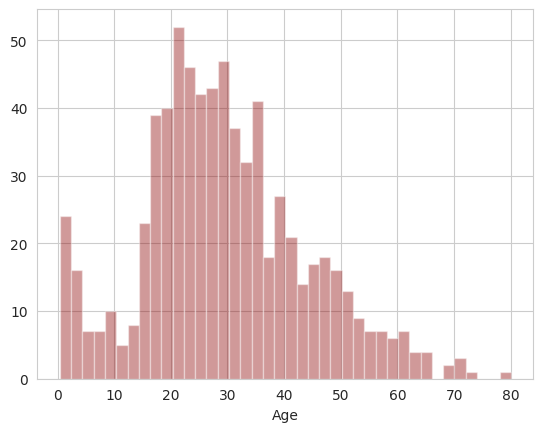

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False, color='darkred',bins=40)
# dropna() removed the null values from Age colmn
# kde = True -> used to generate prob. density graph

<Axes: >

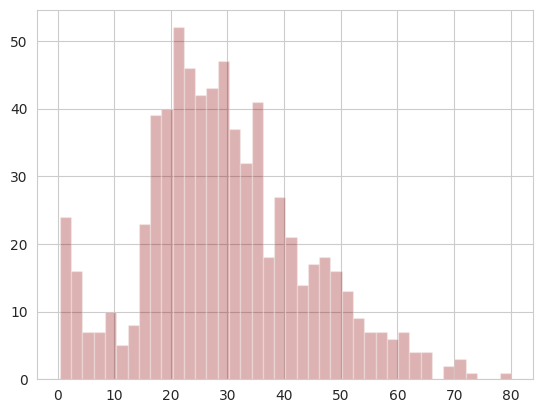

In [ ]:
train['Age'].hist(bins=40, color='darkred', alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

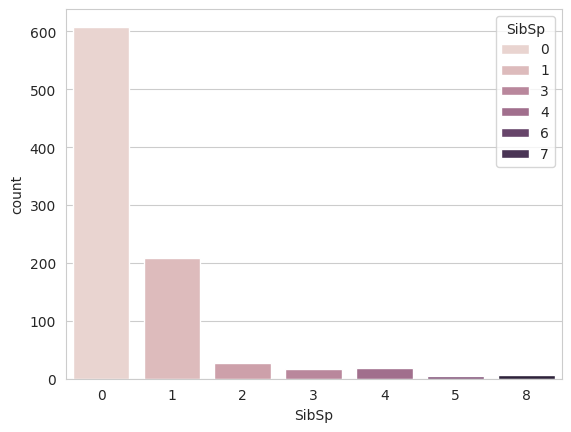

In [ ]:
# how many people have sibling and spouse

sns.countplot(x='SibSp', data= train, hue='SibSp')

<Axes: >

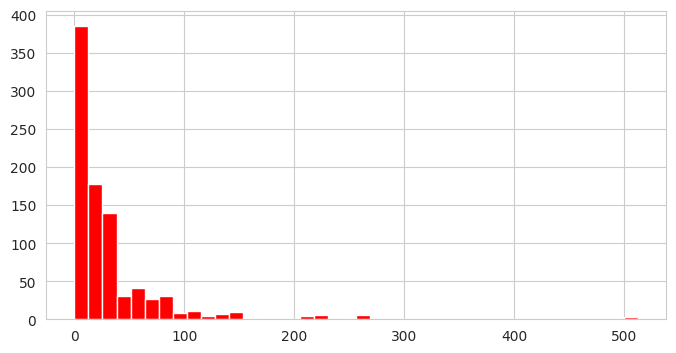

In [ ]:
train['Fare'].hist(color='red',bins=40, figsize=(8,4))

## Data Cleaning

<ipython-input-56-551bc5ec5847>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

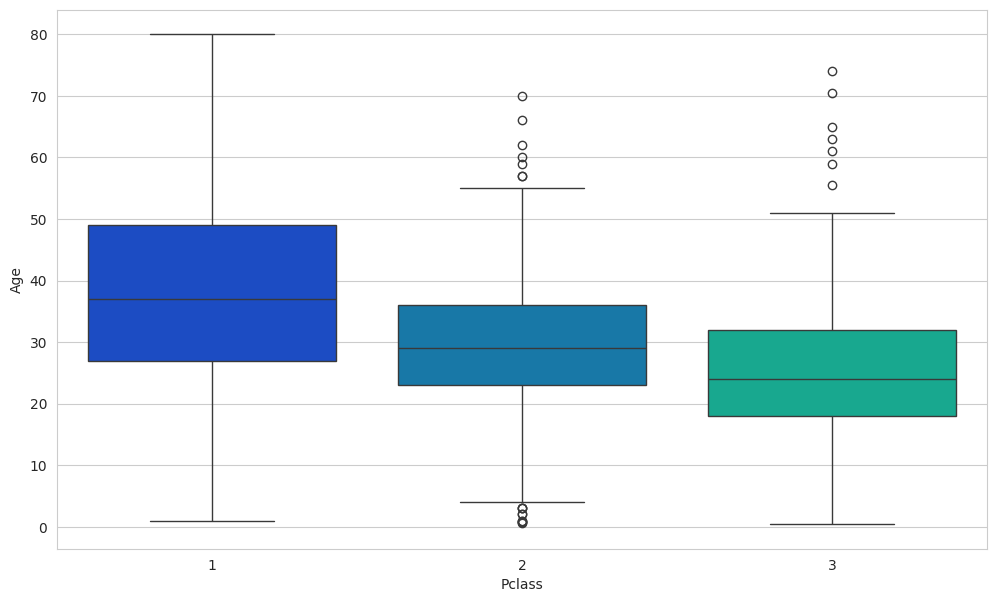

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
# now replacing the Nan/missing data with the average vlaue of calls 1 ,2, 3 from the above fig

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis= 1)

<Axes: >

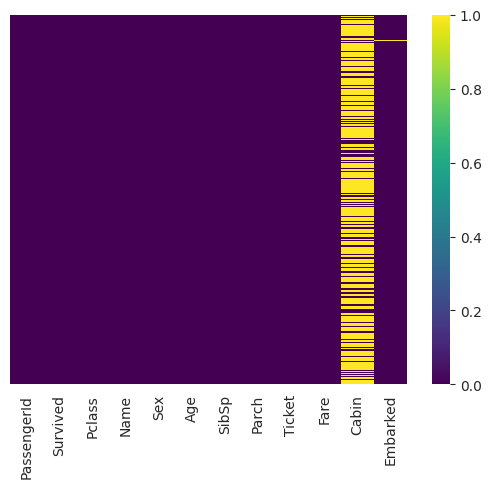

In [ ]:
# successfully deal with the null values
sns.heatmap(train.isnull(), yticklabels = False, cmap='viridis')

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)
# inplace  = True doesn't create any new dataframe after removing the Cabin col herrere

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

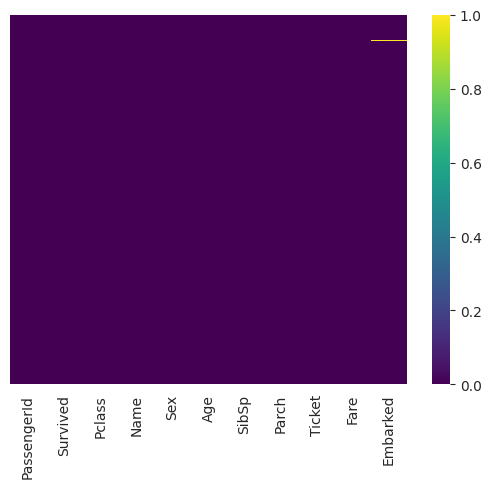

In [ ]:
sns.heatmap(train.isnull(), yticklabels= False,cmap='viridis')

In [ ]:
train.head()
# here PassengerId , name not required
# and Sex , Embarked (categorical data) must be conveted to numerical format

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1



''' drop first means if there are two categories A, B then if value of A = 1, theN B = 0 obviously
then we no need B, Onli A is sufficient'''

In [ ]:
# create new cols . here categories get converted into numnerical values
Sex = pd.get_dummies(train['Sex'], drop_first=True)
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
# dropping all the unwanted stuff from the train table
train.drop(['Sex','Embarked', 'Name','Ticket'], inplace= True, axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train, Sex, Embarked], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
